In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [3]:
#Loading numpy zip
data = np.load('./data/data_10000_norm.npz')

In [4]:
data.files

['arr_0', 'arr_1']

In [5]:
X = data['arr_0'] #independent features
y = data['arr_1'] #target value

In [6]:
X.shape, y.shape

((5459, 10000), (5459,))

# Eigen Image

In [7]:
X1 = X - X.mean(axis = 0)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components= None, whiten= True, svd_solver='auto')

In [10]:
x_pca = pca.fit_transform(X1)

In [12]:
x_pca.shape

(5459, 5459)

In [13]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

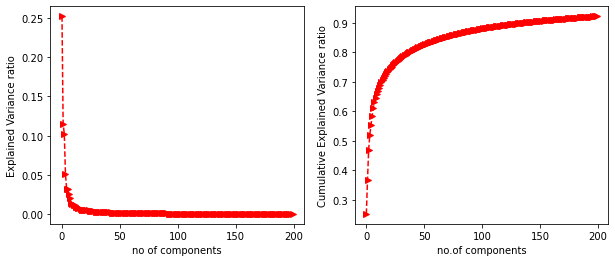

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200], 'r>--')
plt.xlabel('no of components')
plt.ylabel('Explained Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no.of components')
plt.ylabel('Cumulative Explained Variance ratio')
plt.plot(eigen_ratio_cum[:200], 'r>--')
plt.show()

# conclusion using elbow method, consider number of component is between 25 - 30
> since if I consider component between 25 to 30 the explained variance is around 75% so, in order to get min 80% variance I am considering 50 components

In [18]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [19]:
x_pca_50.shape

(5459, 50)

In [20]:
#savind pca
import pickle

In [22]:
pickle.dump(pca_50, open('./model/pca_50.pickle', 'wb'))

In [23]:
#considering 50 components and inverse Transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [24]:
x_pca_inv.shape

(5459, 10000)

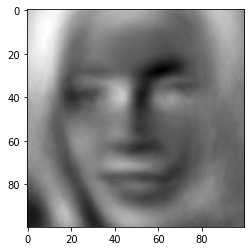

In [25]:
#consider one image(one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img, cmap='gray')

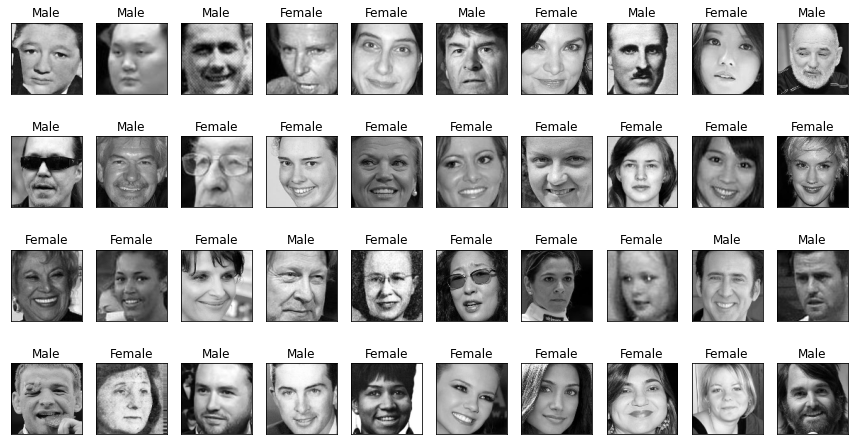

====================Eigen Images========================================


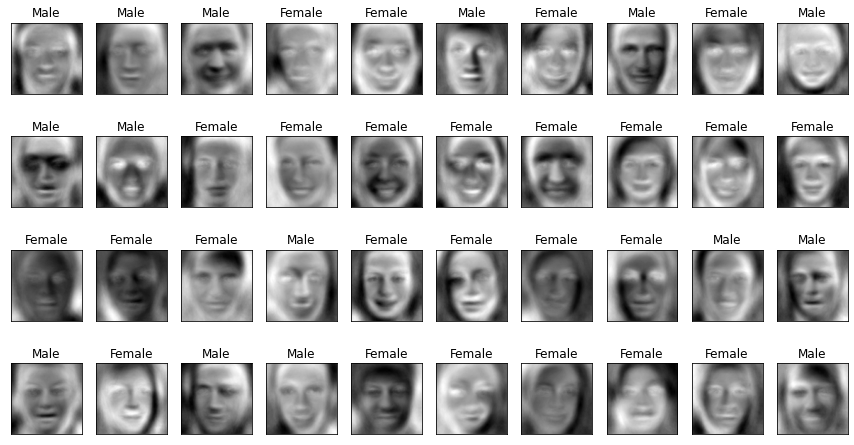

In [29]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print('='*20+'Eigen Images'+'=='*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img, cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [30]:
#saving
np.savez('./data/data_pca_50_y_mean.pickle',x_pca_50, y, X.mean(axis=0))